In [360]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as plticker
plt.style.use('fivethirtyeight')

import pandas as pd

colors = list(mcolors.TABLEAU_COLORS.values())


# 1. Data Loading

In [361]:
data = pd.read_csv('train.csv')
genre_mapping = pd.read_csv('genre-mapping.csv', index_col = 'ID').to_dict()['Genre']
data['Genre'] = data['Class'].apply(lambda x: genre_mapping[x]).astype('category')
del data['Class']
del data['mode']

In [362]:
data['key'] = data['key'].astype('category')
data['time_signature'] = data['time_signature'].astype('category')

In [363]:
data.dtypes

Artist Name             object
Track Name              object
Popularity             float64
danceability           float64
energy                 float64
key                   category
loudness               float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
duration_in min/ms     float64
time_signature        category
Genre                 category
dtype: object

# 2. Data Cleaning

## 2.1 Summaries

/Users/krishna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


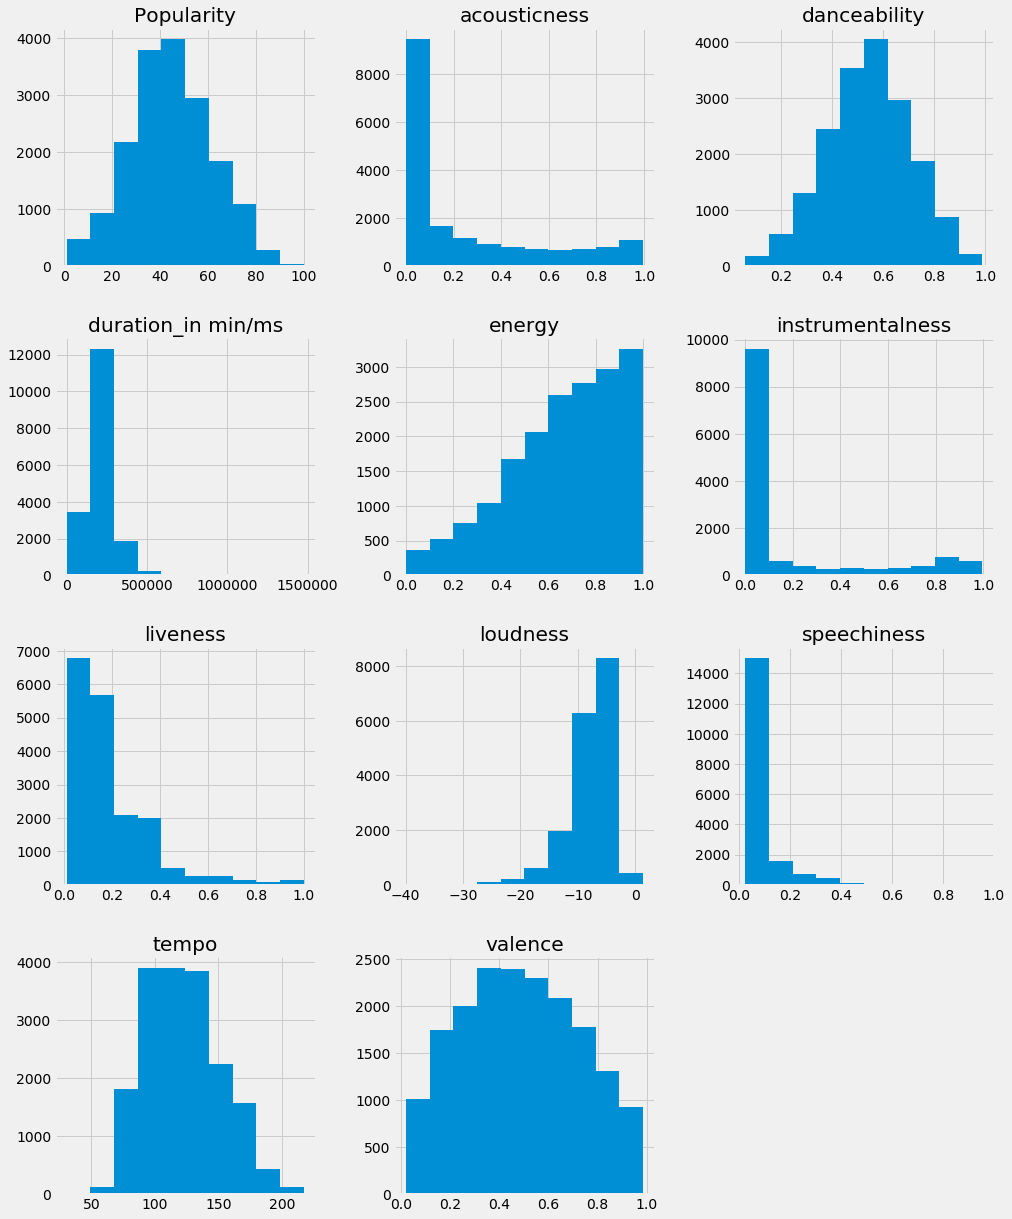

In [366]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.select_dtypes(include=['float64']).hist(ax = ax);

In [326]:
data.select_dtypes(include=['float64']).agg(['min','mean','median','max'])

Popularity  danceability    energy  loudness  speechiness  \
min       1.000000      0.059600  0.000020 -39.95200     0.022500   
mean     44.512124      0.543433  0.662777  -7.91066     0.079707   
median   44.000000      0.545000  0.700000  -7.01600     0.047400   
max     100.000000      0.989000  1.000000   1.35500     0.955000   

        acousticness  instrumentalness  liveness   valence       tempo  \
min         0.000000          0.000001   0.01190  0.018300   30.557000   
mean        0.247082          0.177562   0.19617  0.486208  122.623294   
median      0.081400          0.003910   0.12900  0.481000  120.065500   
max         0.996000          0.996000   1.00000  0.986000  217.416000   

        duration_in min/ms  
min           5.016500e-01  
mean          2.007445e+05  
median        2.091600e+05  
max           1.477187e+06

## 2.2 Fix Duration Column

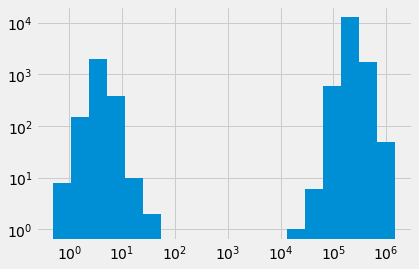

In [365]:
x = data['duration_in min/ms']

logbins = np.geomspace(x.min(), x.max(), 20)

plt.hist(x, bins=logbins)
plt.xscale('log')
plt.yscale('log')


In [328]:
pd.DataFrame(pd.cut(data['duration_in min/ms'], logbins)).groupby('duration_in min/ms').size()

duration_in min/ms
(0.502, 1.099]                  7
(1.099, 2.406]                149
(2.406, 5.27]                2034
(5.27, 11.543]                377
(11.543, 25.28]                10
(25.28, 55.367]                 2
(55.367, 121.263]               0
(121.263, 265.586]              0
(265.586, 581.675]              0
(581.675, 1273.96]              0
(1273.96, 2790.175]             0
(2790.175, 6110.924]            0
(6110.924, 13383.892]           0
(13383.892, 29312.843]          1
(29312.843, 64199.766]          6
(64199.766, 140607.651]       609
(140607.651, 307953.015]    13012
(307953.015, 674465.855]     1738
(674465.855, 1477187.0]        49
dtype: int64

In [329]:
f1 = data['duration_in min/ms'] <= 55.367
f2 = data['duration_in min/ms'] >= 13383.892

data[f1 | f2].shape

(17996, 16)

In [368]:
data['Duration'] = data['duration_in min/ms'].apply(lambda x: x if x <= 55.367 else x/60000)
del data['duration_in min/ms']

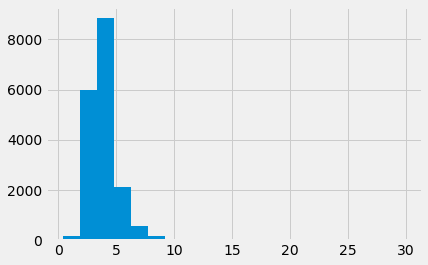

In [369]:
data['Duration'].hist(bins = 20)

## 2.3 Missing Data

In [333]:
data.isnull().sum()

Artist Name            0
Track Name             0
Popularity           428
danceability           0
energy                 0
key                 2014
loudness               0
speechiness            0
acousticness           0
instrumentalness    4377
liveness               0
valence                0
tempo                  0
time_signature         0
Genre                  0
Duration               0
dtype: int64

# 3. Exploratory Data Analysis

In [334]:
data.groupby('Genre').size().sort_values(ascending = False)

Genre
Rock             4949
Indie Alt        2587
Pop              2524
Metal            1854
HipHop           1447
Alt_Music        1373
Blues            1272
Acoustic/Folk     625
Instrumental      576
Bollywood         402
Country           387
dtype: int64

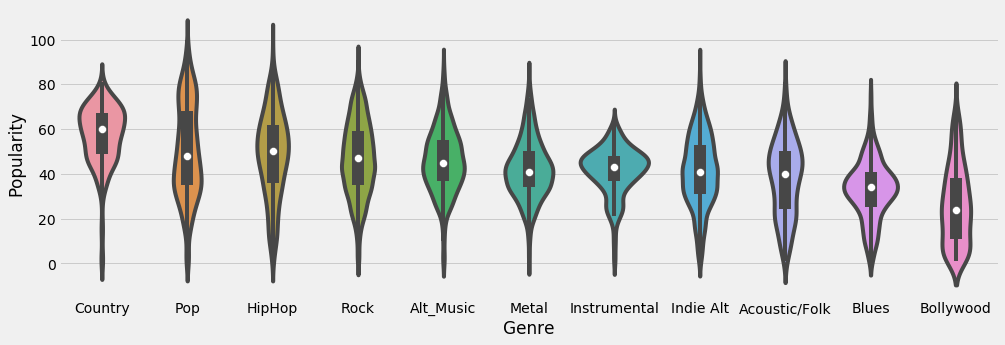

In [495]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "Popularity"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

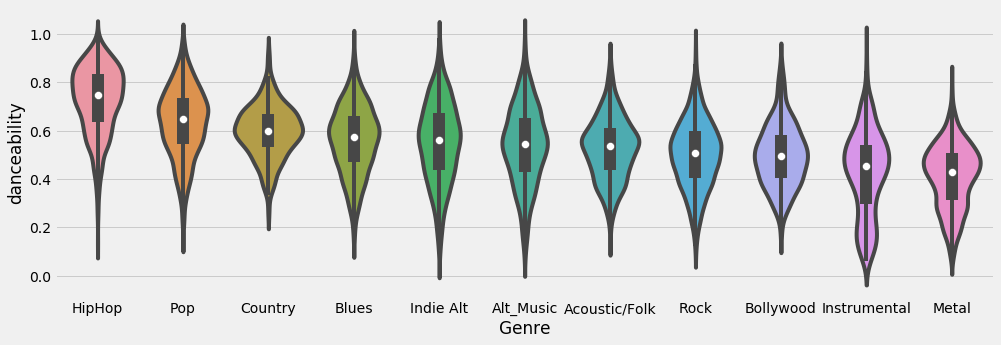

In [496]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "danceability"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

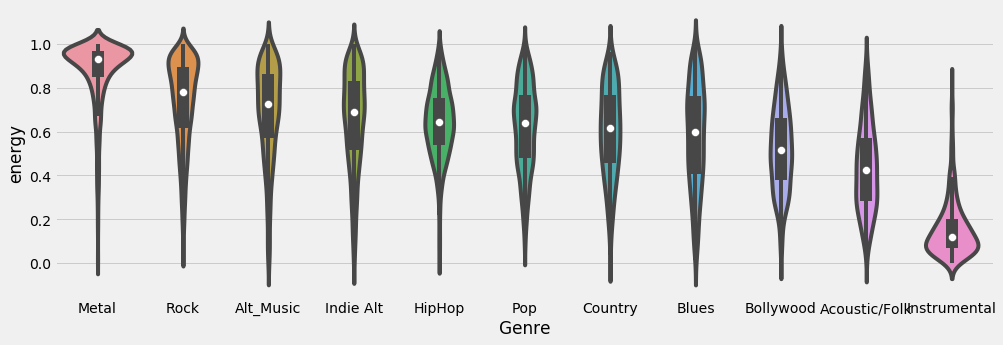

In [497]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "energy"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

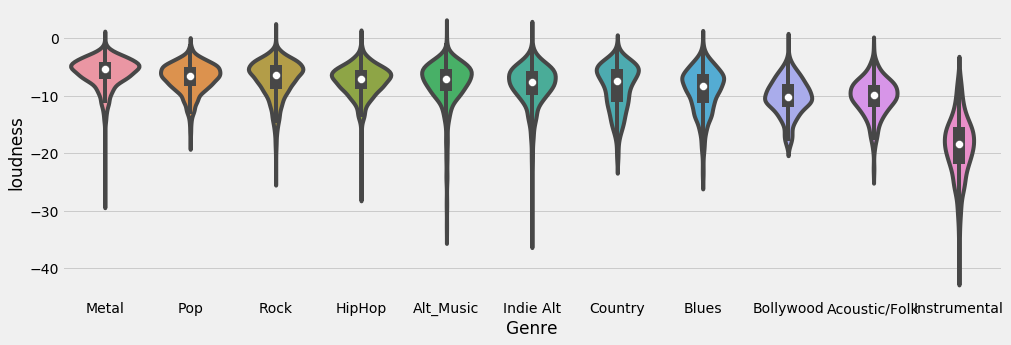

In [499]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "loudness"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

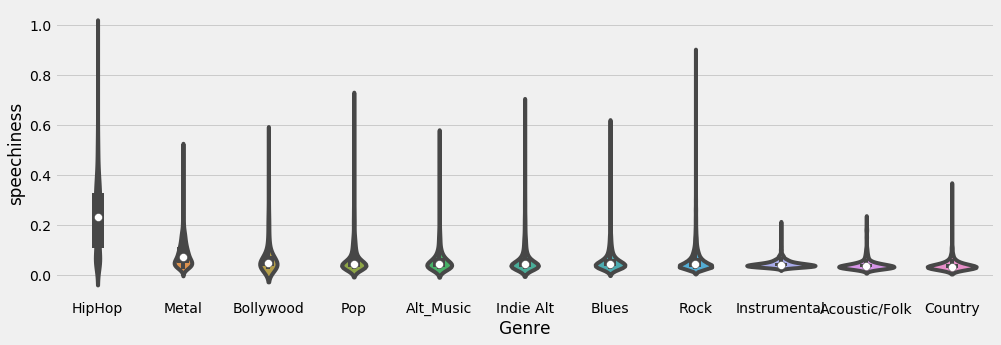

In [500]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "speechiness"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

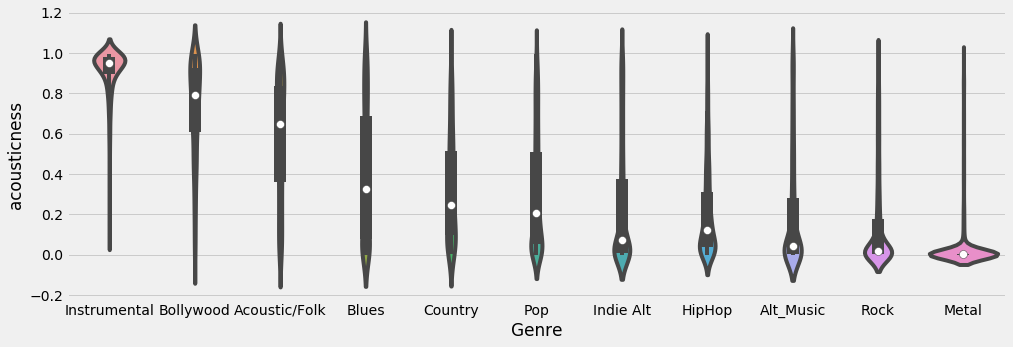

In [501]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "acousticness"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

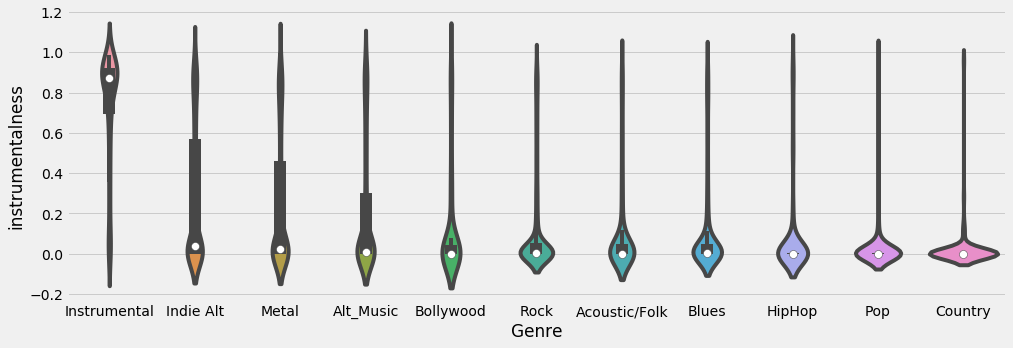

In [502]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "instrumentalness"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

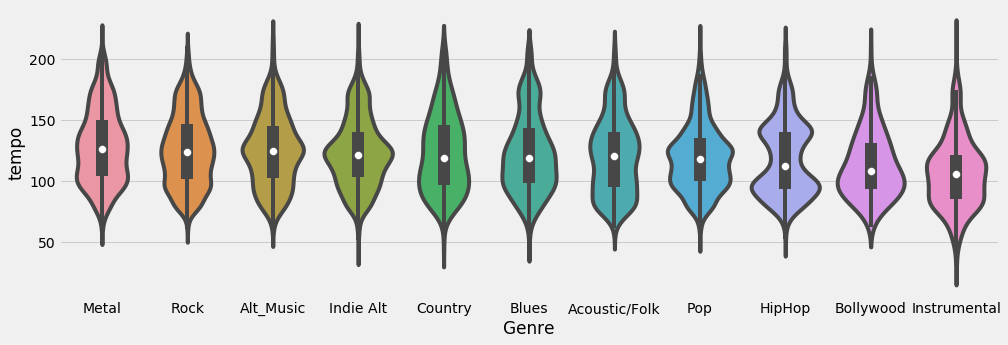

In [504]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "tempo"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

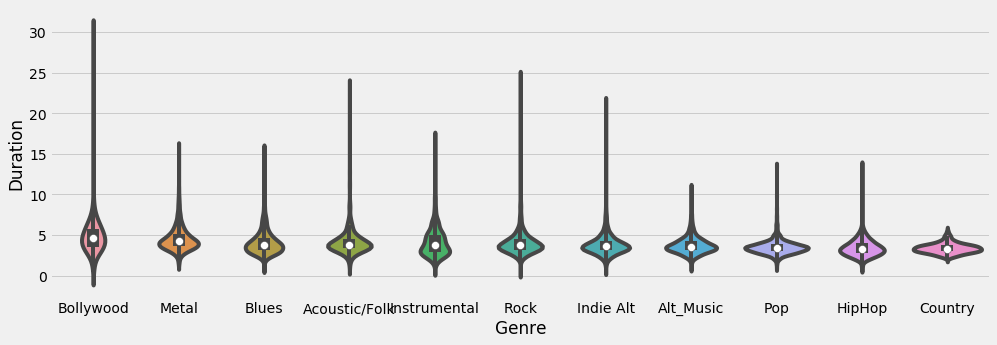

In [505]:
fig,ax = plt.subplots(figsize = (15,5))
feature = "Duration"
order = my_order = data.groupby(by=["Genre"])[feature].mean().sort_values(ascending = False).index

ax = sns.violinplot(x="Genre", y=feature, data=data, order = order)

In [498]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'Genre', 'Duration'],
      dtype='object')

Popularity  danceability  energy  loudness  speechiness  acousticness  \
0            60.0         0.854   0.564    -4.964       0.0485      0.017100   
1            54.0         0.382   0.814    -7.230       0.0406      0.001100   
2            35.0         0.434   0.614    -8.334       0.0525      0.486000   
3            66.0         0.853   0.597    -6.528       0.0555      0.021200   
4            53.0         0.167   0.975    -4.279       0.2160      0.000169   
...           ...           ...     ...       ...          ...           ...   
17991        35.0         0.166   0.109   -17.100       0.0413      0.993000   
17992        27.0         0.638   0.223   -10.174       0.0329      0.858000   
17993        34.0         0.558   0.981    -4.683       0.0712      0.000030   
17994        29.0         0.215   0.805   -12.757       0.1340      0.001290   
17995        43.0         0.400   0.853    -5.320       0.0591      0.006040   

       instrumentalness  liveness  valence    tempo  Duration  
0                   NaN    0.0849   0.8990  134.071  3.909933  
1              0.004010    0.1010   0.5690  116.454  4.195550  
2              0.000196    0.3940   0.7870  147.681  1.827783  
3                   NaN    0.1220   0.5690  107.033  2.899467  
4              0.016100    0.1720   0.0918  199.060  3.832667  
...                 ...       ...      ...      ...       ...  
17991          0.824000    0.0984   0.1770  171.587  3.224167  
17992          0.000016    0.0705   0.3350   73.016  4.284450  
17993          0.000136    0.6660   0.2620  105.000  3.603700  
17994          0.916000    0.2560   0.3550  131.363  3.661550  
17995          0.212000    0.3340   0.3770  138.102  3.037117  

[17996 rows x 11 columns]

In [516]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
temp = data.select_dtypes(include=['float64']).dropna()
pca = PCA(2)
 

df = pca.fit_transform(temp)


kmeans = KMeans(n_clusters= 11)
 
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

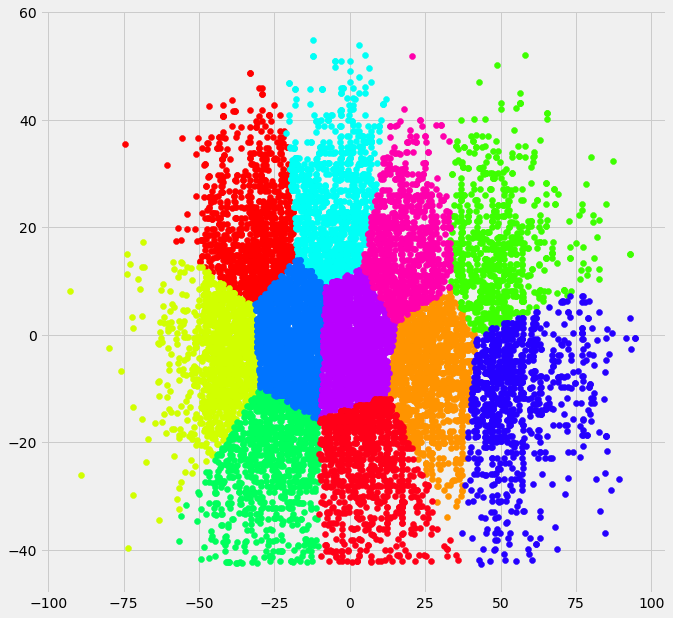

In [531]:
fig,ax = plt.subplots(figsize = (10,10))
hsv = plt.get_cmap('hsv')

for count,i in enumerate(u_labels):
    ax.scatter(df[label == i , 0] , df[label == i , 1] , label = i, color= hsv(float(i)/10))
plt.show()

# 4.  Classification

In [568]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [569]:
pipeline = Pipeline([
    ('scalar',StandardScaler(with_mean=False)),
    ('clf', LogisticRegression())
])

In [570]:
parameters = {
    # smoothing parameter for the naive bayes algorithm
    'clf__C': [0.1 * x for x in range(1,11)],
}

X = data.select_dtypes(include=['float64']).dropna()
y = data.iloc[t]['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
ksplits = StratifiedShuffleSplit()


model = GridSearchCV(estimator=pipeline, cv = ksplits.split(X_traintrain,y_train),
    param_grid=parameters,verbose = 2,n_jobs = -1)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [571]:
model.fit(X_train,y_train)

Fitting 0 folds for each of 10 candidates, totalling 0 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   0 out of   0 | elapsed:    0.0s finished


ValueError: No fits were performed. Was the CV iterator empty? Were there no candidates?

In [562]:
y_pred = model.predict(X_test)

In [563]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Acoustic/Folk       0.27      0.12      0.17       220
    Alt_Music       0.00      0.00      0.00       599
        Blues       0.33      0.34      0.34       524
    Bollywood       0.60      0.40      0.48       139
      Country       0.00      0.00      0.00        75
       HipHop       0.48      0.44      0.46       276
    Indie Alt       0.40      0.26      0.32      1148
 Instrumental       0.70      0.86      0.77       269
        Metal       0.54      0.51      0.53       838
          Pop       0.35      0.30      0.32       635
         Rock       0.42      0.70      0.52      1930

     accuracy                           0.43      6653
    macro avg       0.37      0.36      0.35      6653
 weighted avg       0.39      0.43      0.40      6653



In [566]:
data.dtypes

Artist Name           object
Track Name            object
Popularity           float64
danceability         float64
energy               float64
key                 category
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature      category
Genre               category
Duration             float64
dtype: object